<a href="https://colab.research.google.com/github/RajivChitale/epoch/blob/main/RL-tabular-methods/07-policy-iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
!pip install ray[rllib]
# !pip install --upgrade ipykernel
import gymnasium as gym
from matplotlib import pyplot as plt

In [8]:
env = gym.make('FrozenLake-v1', map_name = '4x4', is_slippery = True)

  # MAP:
  # "SFFF",
  # "FHFH",
  # "FFFH",
  # "HFFG"

# env.env.P[3]

height = 4
width = 4
# num_actions = env.env.action_space.n

In [37]:
class PolicyIterationRunner:
  def __init__(self, theta = 0.001, discount = 0.99, num_actions=4, num_states=16):
    self.theta = theta
    self.discount = discount
    self.num_states = num_states
    self.num_actions = num_actions

    self.V = np.random.random(self.num_states)
    self.P = np.random.randint(self.num_actions, size=self.num_states)
    self.policy_converged = False


  def estimate_value(self, state, action):
    future = env.env.P[state][action]

    updated_value = 0   # default for terminal state
    for next in future:
      # if next == state:
      #   continue
      probability, next_state, reward, done = next
      updated_value += probability * (reward + self.discount * self.V[next_state])
    return updated_value

  def infer_policy(self, state):
    # find maximum over all actions
    max_value = None
    best_action = None

    for action in range(self.num_actions):
      action_value = self.estimate_value(state, action)

      if max_value == None or max_value < action_value:
        max_value = action_value
        best_action = action
      # print(V[state], max_value)
    return best_action


  def policy_evaluation(self):
    while True:
      delta = 0
      for state in range(self.num_states):
        v = self.V[state]    # old value
        self.V[state] = self.estimate_value(state, self.P[state])    # renew value of state, following current policy
        delta = max(delta, abs(self.V[state] - v))

      if delta < self.theta: break
    return

  def policy_improvement(self):
    self.policy_converged = True
    for state in range(self.num_states):
      prev_policy = self.P[state]
      self.P[state] = self.infer_policy(state)
      if self.P[state] != prev_policy:
        self.policy_converged = False
    return


  def policy_iteration(self):
    i=0
    while not self.policy_converged:
      i+=1
      print("iteration", i)
      self.policy_evaluation()
      self.policy_improvement()

  def display_result(self):
    action_map = {
      0 : 'L',
      1 : 'D',
      2 : 'R',
      3 : 'U'
    }
    P = np.vectorize(lambda x: action_map[x]) (self.P)
    print(self.V.reshape(height, width))
    print(P.reshape(height, width))



In [39]:
runner = PolicyIterationRunner(theta = 0.001, discount = 0.99)
runner.policy_iteration()
runner.display_result()

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
[[5.37102378e-01 4.89541672e-01 4.58364462e-01 4.42953636e-01]
 [5.54448002e-01 2.46041812e-02 3.62709106e-01 5.77876138e-03]
 [5.89208337e-01 6.42311067e-01 6.16333892e-01 3.07567168e-02]
 [4.40860686e-03 7.41182749e-01 8.62729319e-01 3.85328819e-04]]
[['L' 'U' 'U' 'U']
 ['L' 'L' 'L' 'L']
 ['U' 'D' 'L' 'L']
 ['L' 'R' 'D' 'L']]


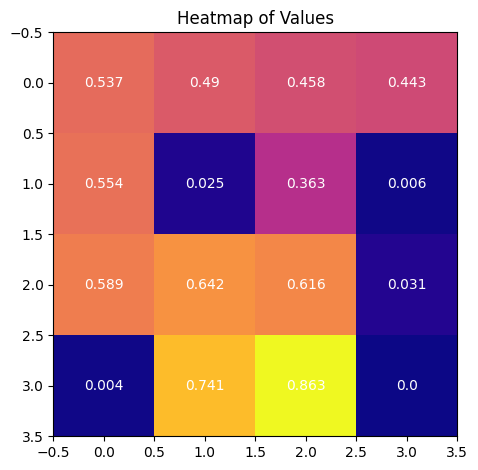

In [40]:
def heatmap(V):
    fig, ax = plt.subplots()
    im = ax.imshow(V, interpolation='none', cmap='plasma')

    for i in range(height):
        for j in range(width):
            text = ax.text(j, i, round(V[i, j],3), ha="center", va="center", color="w")

    ax.set_title("Heatmap of Values")
    fig.tight_layout()
    plt.show()
    #print(V)

heatmap(runner.V.reshape(height,width))